In [1]:
from datasets import load_dataset
from mltb2.transformers import TransformersTokenCounter
from mltb2.text import clean_all_invisible_chars_and_whitespaces
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

In [2]:
df = load_dataset("berkeley-nest/Nectar", split="train").to_pandas()
df

,prompt,answers,turns,num_responses,source,good_natured
0,\n\nHuman: 0.002 = 1000 \n1 = x?\n\nAssistant:,"[{'answer': 'To find the value of x, we can se...",1,7,[sharegpt],True
1,\n\nHuman: 0:00\nwhat's going on guys it's NAM...,[{'answer': 'Hello! It seems like you're shari...,1,7,[lmsys-chat-1m],True
2,\n\nHuman: 01011001 01001111 01010101 00100000...,[{'answer': 'The binary code you provided tran...,1,7,[anthropic-hh],True
3,"\n\nHuman: ""012345"", ""001122"", ""ee44aa"", ""abcd...","[{'answer': 'Sure, I can help you write a func...",1,7,[lmsys-chat-1m],True
4,\n\nHuman: #01 You are an assistant that helps...,"[{'answer': '{ ""thoughts"": ""Based on the c...",1,7,[lmsys-chat-1m],True
...,...,...,...,...,...,...
182949,"\n\nHuman: Zimkus, B. M., L. P. Lawson, M. F. ...","[{'answer': 'The Mascarene ridged frogs, also ...",1,7,[ultrachat],True
182950,\n\nHuman: Zoe goes to the store to buy soda a...,"[{'answer': 'First, we need to determine the t...",1,7,[flan_v2_cot],True
182951,\n\nHuman: Zomaria interruptolineana\n\nAssist...,[{'answer': 'Zomaria interruptolineana is a sp...,1,7,[lmsys-chat-1m],True
182952,\n\nHuman: Zombies don't need something when t...,[{'answer': 'Interesting riddle! The answer co...,2,7,[anthropic-hh],True


In [3]:
print(df.iloc[0]["prompt"])
print("###############################")

for answer in df.iloc[0]["answers"]:
    print(answer["rank"])
    print(answer["answer"])
    print("---")





Human: 0.002 = 1000 
1 = x?

Assistant: 
###############################
1.0
To find the value of x, we can set up a proportion using the given information:

0.002/1000 = 1/x

To solve for x, we can cross multiply:

0.002 * x = 1000 * 1

0.002x = 1000

Dividing both sides by 0.002:

x = 1000 / 0.002

x = 500,000

Therefore, 1 is equal to 500,000 in this proportion.
---
2.0
To solve for x in this equation, you can use cross-multiplication. Here's how:

0.002 / 1 = 1000 / x

Cross-multiplication gives:

0.002 * x = 1000

To solve for x, divide both sides by 0.002:

x = 1000 / 0.002

So, x equals 500,000.
---
3.0
This looks like a proportion. To solve for x, you can set up a proportion equation:

0.002 / 1 = 1000 / x

Now, cross-multiply:

0.002 \* x = 1 \* 1000

Then, solve for x:

0.002x = 1000

x = 1000 / 0.002

x = 500,000
---
4.0
If 0.002 equals 1000, then 1 would equal 500,000.
---
5.0
I apologize, but the equation you provided is not correct.

0.002 is equal to 0.002, not 1000.



## Insight

- ranking with 1.0 is the best score

In [4]:
df["source"].value_counts(dropna=False)

source
[anthropic-hh]               74062
[lmsys-chat-1m]              43399
[sharegpt]                   24948
[flan_v2_niv2]               12019
[evol_instruct]               9965
                             ...  
[lmsys-chat-1m, sharegpt]        1
[lmsys-chat-1m, sharegpt]        1
[truthful_qa, sharegpt]          1
[truthful_qa, sharegpt]          1
[lmsys-chat-1m, sharegpt]        1
Name: count, Length: 204, dtype: int64

## Insight

- more than one source for a single row is strange
- let us remove rows with more than one source

In [5]:
df["good_natured"].value_counts(dropna=False)

good_natured
True     164500
False     18454
Name: count, dtype: int64

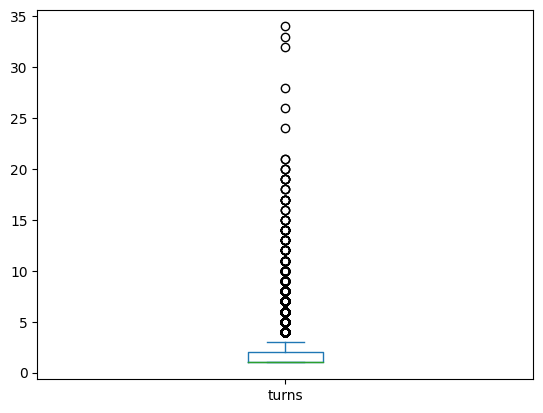

In [6]:
_ = df["turns"].plot.box()

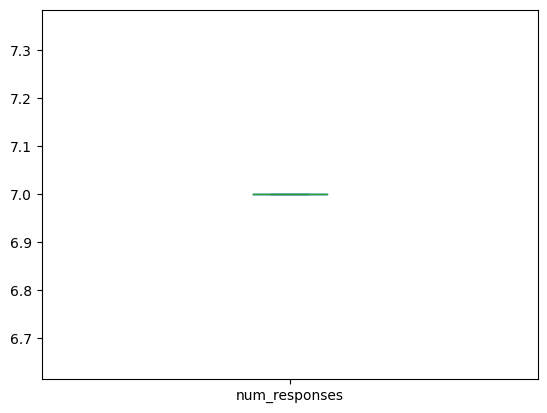

In [7]:
_ = df["num_responses"].plot.box()

## Insight

- we always have 7 responses
- can remove this column

In [8]:
idx = 4
print(df[~df["good_natured"]].iloc[idx]["prompt"])
print(df[~df["good_natured"]].iloc[idx]["answers"][0]["answer"])



Human: 1. Why do most people in Africa spit?
2. I think it is more common in North Africa. but why?
3.If most people in society eat rice for every meal, it can be said that it is part of their culture. Yeah?
4.So when most people in Africa spit when they walk, we can say that it is part of their culture.

Assistant: 
I appreciate your curiosity, but it's important to avoid generalizations about any group of people, including those living in Africa. Africa is a vast continent with 54 countries and a wide range of cultures, traditions, and behaviors. Not all people in Africa, or any specific region of Africa, have the same habits or customs. 

As for your question about spitting, it's not accurate or fair to say that most people in Africa, or North Africa, spit when they walk. People's behaviors can vary greatly even within the same country or city, let alone across an entire continent.

Regarding your third question, yes, if a significant portion of a society eats a particular food, s

## Insight

- good_natured False looks ok
- lets keep it